In [1]:
# https://stackoverflow.com/questions/20677795/how-do-i-compute-the-intersection-point-of-two-lines
# https://docs.sympy.org/latest/modules/geometry/lines.html#sympy.geometry.line.Ray2D

In [2]:
# import sympy and Point, Line 
from sympy import Point, Line, Segment, Ray
import numpy as np

from enum import Enum

class State(Enum):
    STARTED = 2
    INTERSECTED_DOWN = 3
    INTERSECTED_UPPER = 4
    CAME_OUT = 1
    CAME_IN = 0

In [ ]:
d = np.float128(1)               # толщина мембраны
r = np.float128(0.1)             # половина размера меньшего отверстия
#alpha = 20/360*2*pi             # образующий угол клина
a = np.float128(0.1)             # дополнительный размер плоскости мембраны со стороны большего размера отверстия

epsilon = np.float128(1e-16)

color = "green"

calc_float = True
draw_normal = False
logging = False

def draw_wedge(alpha, traj_ray_1):
    plt = Graphics()
    
    R = np.float128((r + d * tan(np.float128(alpha))))
    
    p1 = (0, r)
    p2 = (d, R)
    wedge_segment_upper = Segment(p1, p2)
    plt += line (wedge_segment_upper.points, color = color, linestyle="dashed")

    p1 = (0, r)
    p2 = (0, R + a)
    plt += line ([p1, p2], color = color, linestyle="dashed")

    p1 = (d, R)
    p2 = (d, R + a)
    plt += line ([p1, p2], color = color, linestyle="dashed")



    p1 = (0, -r)
    p2 = (d, -R)
    wedge_segment_down = Segment(p1, p2)
    plt += line (wedge_segment_down.points, color = color, linestyle="dashed")

    p1 = (0, -r)
    p2 = (0, -R - a)
    plt += line ([p1, p2], color = color, linestyle="dashed")

    p1 = (d, -R)
    p2 = (d, -R - a)
    plt += line ([p1, p2], color = color, linestyle="dashed")


    segment_out = Segment((np.float128(0),  r),
                          (np.float128(0), -r))
    segment_in  = Segment((d,  R),
                          (d, -R))

    state = State.STARTED
    number_of_intersections = 0
        
    def traj_ray_intersect_wedge_segment_down(plt, alpha, traj_ray, number_of_intersections):
        try:
            intersection_down = traj_ray.intersect(wedge_segment_down)
        except:
            intersection_down = ()

        if (intersection_down == wedge_segment_down):
            if traj_ray.xdirection > 0:
                return plt, State.CAME_IN, number_of_intersections
            elif traj_ray.xdirection < 0:
                return plt, State.CAME_OUT, number_of_intersections
        elif len(intersection_down) > 0:
            intersection_point_down, = intersection_down

            #if traj_ray.source != intersection_point_down:
            if  abs(traj_ray.source.x - intersection_point_down.x) > epsilon or \
                abs(traj_ray.source.y - intersection_point_down.y) > epsilon:

                if calc_float:
                    intersection_point_down = Point(
                        np.float128(intersection_point_down.x),
                        np.float128(intersection_point_down.y))
    
                if logging:
                    print("intersection_point_down",
                          intersection_point_down)

                plt += arrow(traj_ray.source, intersection_point_down, linestyle="dashed")

                traj_ray_angle_between_wedge_segment_down = traj_ray.angle_between(wedge_segment_down)
                if calc_float:
                    traj_ray_angle_between_wedge_segment_down = np.float128(
                        traj_ray_angle_between_wedge_segment_down)

                if logging:
                    print("traj_ray.angle_between(wedge_segment_down)",
                          traj_ray_angle_between_wedge_segment_down)

                down_normal_angle = pi/2-alpha
                if logging:
                    print("down_normal_angle", down_normal_angle)

                if draw_normal:
                    ray_normal = Ray(intersection_point_down, angle = down_normal_angle)
                    print("ray_normal"
                          , np.float128(ray_normal.points[0].x)
                          , np.float128(ray_normal.points[0].y)
                          , np.float128(ray_normal.points[1].x)
                          , np.float128(ray_normal.points[1].y)
                        )

                    intersection_normal = ray_normal.intersect(wedge_segment_upper)
                    if len(intersection_normal) > 0:
                        intersection_normal_point, = intersection_normal

                        intersection_normal_point = Point(
                            np.float128(intersection_normal_point.x),
                            np.float128(intersection_normal_point.y))
                        if logging:
                            print("intersection_normal_point with wedge_segment_upper", intersection_normal_point)
                        plt += line((ray_normal.source, intersection_normal_point))
                    else:
                        intersection_normal = ray_normal.intersect(segment_in)
                        if len(intersection_normal) > 0:
                            intersection_normal_point, = intersection_normal

                            intersection_normal_point = Point(
                                np.float128(intersection_normal_point.x),
                                np.float128(intersection_normal_point.y))
                            if logging:
                                print("intersection_normal_point with wedge_segment_upper", intersection_normal_point)
                            plt += line((ray_normal.source, intersection_normal_point))

                angle_ray_2 = down_normal_angle + (traj_ray_angle_between_wedge_segment_down - pi/2)
                if calc_float:
                    angle_ray_2 = np.float128(angle_ray_2)
                if logging:
                    print("angle_ray_2", angle_ray_2)
                traj_ray_2 = Ray(intersection_point_down, angle = angle_ray_2)
                
                number_of_intersections += 1

                return draw_traj(plt, alpha, traj_ray_2, State.INTERSECTED_DOWN, number_of_intersections)
            
            #if traj_ray.source == intersection_point_down:
            else:
                traj_ray_angle_between_wedge_segment_down = traj_ray.angle_between(wedge_segment_down)
                if calc_float:
                    traj_ray_angle_between_wedge_segment_down = np.float128(
                        traj_ray_angle_between_wedge_segment_down)

                if logging:
                    print("traj_ray.angle_between(wedge_segment_down)",
                          traj_ray_angle_between_wedge_segment_down)
                
                down_normal_angle = pi/2-alpha
                if logging:
                    print("down_normal_angle", down_normal_angle)
                angle_ray_2 = down_normal_angle + \
                    (traj_ray_angle_between_wedge_segment_down - pi/2)
                if calc_float:
                    angle_ray_2 = np.float128(angle_ray_2)
                if logging:
                    print("angle_ray_2", angle_ray_2)
                traj_ray_2 = Ray(traj_ray.source, angle = angle_ray_2)

                if logging:
                    plt += arrow(traj_ray_2.source,
                                 traj_ray_2.points[1],
                                 color="green",
                                 thickness = 0.1
                                )

                number_of_intersections += 1

                return draw_traj(plt, alpha, traj_ray_2, State.INTERSECTED_DOWN, number_of_intersections)

    def traj_ray_intersect_wedge_segment_upper(plt, alpha, traj_ray, number_of_intersections):
        try:
            intersection_upper = traj_ray.intersect(wedge_segment_upper)
        except:
            intersection_upper = ()

        if (intersection_upper == wedge_segment_upper):
            if traj_ray.xdirection > 0:
                return plt, State.CAME_IN, number_of_intersections
            elif traj_ray.xdirection < 0:
                return plt, State.CAME_OUT, number_of_intersections
        elif len(intersection_upper) > 0:
            intersection_point_upper, = intersection_upper

            # if traj_ray.source != intersection_point_upper:
            if  abs(traj_ray.source.x - intersection_point_upper.x) > epsilon or \
                abs(traj_ray.source.y - intersection_point_upper.y) > epsilon:

                if calc_float:
                    intersection_point_upper = Point(
                        np.float128(intersection_point_upper.x),
                        np.float128(intersection_point_upper.y))
                if logging:
                    print("intersection_point_upper",
                          intersection_point_upper)

                plt += arrow(traj_ray.source, intersection_point_upper, linestyle="dashed")

                traj_ray_angle_between_wedge_segment_upper = traj_ray.angle_between(wedge_segment_upper)
                if calc_float:
                    traj_ray_angle_between_wedge_segment_upper = np.float128(
                        traj_ray_angle_between_wedge_segment_upper)
                if logging:
                    print("traj_ray.angle_between(wedge_segment_upper)",
                          traj_ray_angle_between_wedge_segment_upper)

                upper_normal_angle = 2*pi-pi/2+alpha
                if logging:
                    print("upper_normal_angle", upper_normal_angle)

                if draw_normal:
                    ray_normal = Ray(intersection_point_upper, angle = upper_normal_angle)
                    if logging:
                        print("ray_normal"
                          , np.float128(ray_normal.points[0].x)
                          , np.float128(ray_normal.points[0].y)
                          , np.float128(ray_normal.points[1].x)
                          , np.float128(ray_normal.points[1].y)
                        )

                    intersection_normal = ray_normal.intersect(wedge_segment_down)
                    if len(intersection_normal) > 0:
                        intersection_normal_point, = intersection_normal

                        intersection_normal_point = Point(
                            np.float128(intersection_normal_point.x),
                            np.float128(intersection_normal_point.y))
                        if logging:
                            print("intersection_normal_point with wedge_segment_down",
                                  intersection_normal_point)
                        plt += line((ray_normal.source, intersection_normal_point))
                    else:
                        intersection_normal = ray_normal.intersect(segment_in)
                        if len(intersection_normal) > 0:
                            intersection_normal_point, = intersection_normal

                            intersection_normal_point = Point(
                                np.float128(intersection_normal_point.x),
                                np.float128(intersection_normal_point.y))
                            if logging:
                                print("intersection_normal_point with wedge_segment_upper",
                                      intersection_normal_point)
                            plt += line((ray_normal.source, intersection_normal_point))

                angle_ray_2 = upper_normal_angle - (traj_ray_angle_between_wedge_segment_upper - pi/2)
                if calc_float:
                    angle_ray_2 = np.float128(angle_ray_2)
                if logging:
                    print("angle_ray_2", angle_ray_2)
                traj_ray_2 = Ray(intersection_point_upper, angle = angle_ray_2)
                
                number_of_intersections += 1

                return draw_traj(plt, alpha, traj_ray_2, State.INTERSECTED_UPPER, number_of_intersections)

            # if traj_ray.source == intersection_point_upper:
            else:
                traj_ray_angle_between_wedge_segment_upper = traj_ray.angle_between(wedge_segment_upper)
                if calc_float:
                    traj_ray_angle_between_wedge_segment_upper = np.float128(
                        traj_ray_angle_between_wedge_segment_upper)
                if logging:
                    print("traj_ray.angle_between(wedge_segment_upper)",
                          traj_ray_angle_between_wedge_segment_upper)

                upper_normal_angle = 2*pi-pi/2+alpha
                if logging:
                    print("upper_normal_angle", upper_normal_angle)
                angle_ray_2 = upper_normal_angle - \
                    (traj_ray_angle_between_wedge_segment_upper - pi/2)
                if calc_float:
                    angle_ray_2 = np.float128(angle_ray_2)
                if logging:
                    print("angle_ray_2", angle_ray_2)
                traj_ray_2 = Ray(traj_ray.source, angle = angle_ray_2)

                if logging:
                    plt += arrow(traj_ray_2.source,
                                 traj_ray_2.points[1],
                                 color="green",
                                 thickness = 0.1)
               
                number_of_intersections += 1

                return draw_traj(plt, alpha, traj_ray_2, State.INTERSECTED_UPPER, number_of_intersections)

    def traj_ray_intersect_segment_in(plt, alpha, traj_ray, number_of_intersections):
        try:
            intersection_in = traj_ray.intersect(segment_in)
        except:
            intersection_in = ()

        if intersection_in == segment_in:
            return plt, State.CAME_IN, number_of_intersections
        elif len(intersection_in) > 0:
            intersection_point_in, = intersection_in

            #if traj_ray.source != intersection_point_in:
            if  abs(traj_ray.source.x - intersection_point_in.x) > epsilon or \
                abs(traj_ray.source.y - intersection_point_in.y) > epsilon:

                plt += arrow(traj_ray.source, intersection_point_in, linestyle="dashed")

                return plt, State.CAME_IN, number_of_intersections
            else:
                if traj_ray.xdirection > 0:
                    return plt, State.CAME_IN, number_of_intersections
                if logging:
                    print("traj_ray.source", traj_ray.source)
                    print("intersection_point_in", intersection_point_in)

    def traj_ray_intersect_segment_out(plt, alpha, traj_ray, number_of_intersections):
        try:
            intersection_out = traj_ray.intersect(segment_out)
        except:
            intersection_out = ()

        if intersection_out == segment_out:
            return plt, State.CAME_OUT, number_of_intersections
        elif len(intersection_out) > 0:
            intersection_point_out, = intersection_out

            #if traj_ray.source != intersection_point_out:
            if  abs(traj_ray.source.x - intersection_point_out.x) > epsilon or \
                abs(traj_ray.source.y - intersection_point_out.y) > epsilon:

                plt += arrow(traj_ray.source, intersection_point_out, linestyle="dashed")

                return plt, State.CAME_OUT, number_of_intersections
            #if traj_ray.source == intersection_point_out:
            else:
                if traj_ray.xdirection < 0:
                    return plt, State.CAME_OUT, number_of_intersections
                if logging:
                    print("traj_ray.source", traj_ray.source)
                    print("intersection_point_out", intersection_point_out)

    def draw_traj(plt, alpha, traj_ray, state, number_of_intersections):
        if logging:
            plt.show(aspect_ratio = 1, axes=False)
            print("traj_ray", traj_ray)
            print("traj_ray.slope", traj_ray.slope)
            print("traj_ray.direction", traj_ray.direction)
            print("traj_ray.xdirection", traj_ray.xdirection)
            print("traj_ray.ydirection", traj_ray.ydirection)
            print("wedge_segment_down.slope", wedge_segment_down.slope)
            print("wedge_segment_upper.slope", wedge_segment_upper.slope)
            print("segment_in.slope", segment_in.slope)
            print("segment_out.slope", segment_out.slope)

        if traj_ray.xdirection > 0:
            ret = traj_ray_intersect_segment_in(plt, alpha, traj_ray, number_of_intersections)
            if None != ret:
                return ret

        if traj_ray.xdirection < 0:
            ret = traj_ray_intersect_segment_out(plt, alpha, traj_ray, number_of_intersections)
            if None != ret:
                return ret

        if traj_ray.ydirection < 0 and traj_ray.xdirection <= 0:
            ret = traj_ray_intersect_wedge_segment_down(plt, alpha, traj_ray, number_of_intersections)
            if None != ret:
                return ret

        if traj_ray.ydirection < 0 and traj_ray.xdirection > 0 \
        and wedge_segment_down.slope > traj_ray.slope:
            ret = traj_ray_intersect_wedge_segment_down(plt, alpha, traj_ray, number_of_intersections)
            if None != ret:
                return ret

        if traj_ray.xdirection < 0 \
        and wedge_segment_down.slope < traj_ray.slope:
            ret = traj_ray_intersect_wedge_segment_down(plt, alpha, traj_ray, number_of_intersections)
            if None != ret:
                return ret


        if traj_ray.ydirection > 0 and traj_ray.xdirection <= 0:
            ret = traj_ray_intersect_wedge_segment_upper(plt, alpha, traj_ray, number_of_intersections)
            if None != ret:
                return ret

        if traj_ray.ydirection > 0 and traj_ray.xdirection > 0 \
        and wedge_segment_upper.slope < traj_ray.slope:
            ret = traj_ray_intersect_wedge_segment_upper(plt, alpha, traj_ray, number_of_intersections)
            if None != ret:
                return ret

        if traj_ray.xdirection < 0 \
        and wedge_segment_upper.slope > traj_ray.slope:
            ret = traj_ray_intersect_wedge_segment_upper(plt, alpha, traj_ray, number_of_intersections)
            if None != ret:
                return ret

        #plt += arrow(traj_ray.source, traj_ray.points[1], color="red")
        #plt.show(aspect_ratio = 1, axes=False)

        return None


    return draw_traj(plt, alpha, traj_ray_1, state, number_of_intersections)  

In [4]:
def integrand_in (alpha, y, ang):
    calc_float = True
    return draw_wedge(alpha, traj_ray_1 = Ray((d, np.float128(y)), angle = np.float128(ang)))

In [5]:
def integrand_out (alpha, y, ang):
    calc_float = True
    return draw_wedge(alpha, traj_ray_1 = Ray((np.float128(0), np.float128(y)), angle = np.float128(ang)))

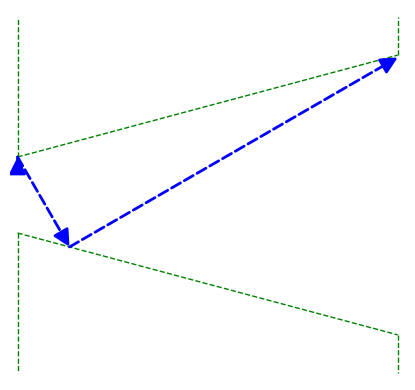

In [8]:
plt, state, number_of_intersections = integrand_out (alpha=pi/12, y = r-0.0001, ang = pi/2-0.0001)
plt.show(aspect_ratio = 1, axes=False)

In [9]:
make_investigation_plots = True
frames = []
if make_investigation_plots:

    import matplotlib.pyplot as mplt
    %matplotlib inline

In [ ]:
if make_investigation_plots:
    alpha_ = pi/12
    R_ = np.float128((r + d * tan(np.float128(alpha_))))

    y_linspace = np.linspace(-R_, R_, 31)

    ang_linspace = np.linspace(np.float128(pi/2+pi/4),
                               np.float128(pi+pi/2-pi/4),
                               37)

    y_list = y_linspace.tolist()
    ang_list = ang_linspace.tolist()

    y_grid,ang_grid = np.meshgrid(y_linspace, ang_linspace)

    u = y_grid * np.nan
    v = y_grid * np.nan

    for iy in np.arange(0, len(y_linspace), 1):
        for iang in np.arange(0, len(ang_linspace), 1):
            y = y_list[iy]
            ang = ang_list[iang]
            plt, state, number_of_intersections = integrand_in (alpha=alpha_, y = y, ang = ang)
            #plt.show(aspect_ratio = 1, axes=False)
            frames += [plt]
            if State.CAME_OUT == state:
                u[iang][iy] = 1
            elif State.CAME_IN == state:
                u[iang][iy] = 0
            v[iang][iy] = number_of_intersections
            #print(iang, iy, u[iang][iy])

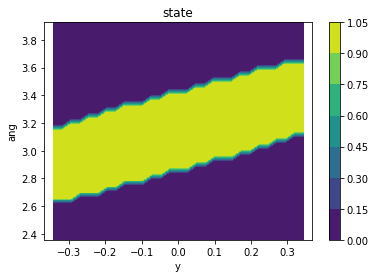

In [11]:
if make_investigation_plots:
    fig,ax=mplt.subplots(1,1)

    cp = ax.contourf(y_grid,ang_grid, u)
    fig.colorbar(cp) # Add a colorbar to a plot
    ax.set_title('state')
    ax.set_xlabel('y')
    ax.set_ylabel('ang')
    mplt.show()

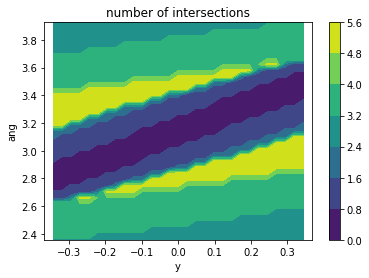

In [12]:
if make_investigation_plots:
    fig,ax=mplt.subplots(1,1)

    cp = ax.contourf(y_grid,ang_grid, v)
    fig.colorbar(cp) # Add a colorbar to a plot
    ax.set_title('number of intersections')
    ax.set_xlabel('y')
    ax.set_ylabel('ang')
    mplt.show()

In [13]:
y_linspace

array([-0.36794919, -0.34341925, -0.3188893 , -0.29435935, -0.26982941,
       -0.24529946, -0.22076952, -0.19623957, -0.17170962, -0.14717968,
       -0.12264973, -0.09811978, -0.07358984, -0.04905989, -0.02452995,
        0.        ,  0.02452995,  0.04905989,  0.07358984,  0.09811978,
        0.12264973,  0.14717968,  0.17170962,  0.19623957,  0.22076952,
        0.24529946,  0.26982941,  0.29435935,  0.3188893 ,  0.34341925,
        0.36794919], dtype=float128)

In [28]:
(ang_linspace/pi.n())

array([0.75      , 0.76388889, 0.77777778, 0.79166667, 0.80555556,
       0.81944444, 0.83333333, 0.84722222, 0.86111111, 0.875     ,
       0.88888889, 0.90277778, 0.91666667, 0.93055556, 0.94444444,
       0.95833333, 0.97222222, 0.98611111, 1.        , 1.01388889,
       1.02777778, 1.04166667, 1.05555556, 1.06944444, 1.08333333,
       1.09722222, 1.11111111, 1.125     , 1.13888889, 1.15277778,
       1.16666667, 1.18055556, 1.19444444, 1.20833333, 1.22222222,
       1.23611111, 1.25      ], dtype=float128)

In [40]:
len(y_linspace)

31

In [39]:
sum_come = 0
sum_all = 0
for iy in np.arange(0, len(y_linspace), 1):
    for iang in np.arange(0, len(ang_linspace), 1):
        y = y_list[iy]
        ang = ang_list[iang]
        if not np.isnan(u[iang][iy]):
            sum_come += u[iang][iy]
            sum_all += 1
sum_come, sum_all, sum_come/sum_all/2, R_/r, sum_come/sum_all/2*R_/r

(371.0,
 1073,
 0.17287977632805219013,
 3.6794919243112266082,
 0.6361097408757991946)

In [15]:
anime = animate(frames, aspect_ratio=1, axes=False)#, xmin = -, xmax = +, ymin = -, ymax = +)

Animation with 1073 frames
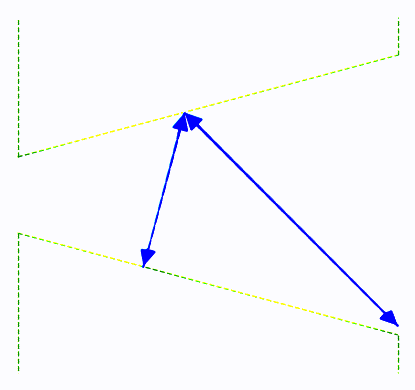

In [17]:
anime.show(use_ffmpeg=True)